<a href="https://colab.research.google.com/github/ghaznamaher/-SQL-Driven-Insights-into-Sales-Performance-/blob/main/Sales_Profitability_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                           "Superstore Sales Profitability Analysis"

**Data Exploration & Processing:**

*Importing necessary libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Reading the dataset*

In [ ]:
data=pd.read_csv("/content/Superstore Dataset.csv",encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


*Dataset Shape*

In [ ]:
data.shape

(9994, 21)

*Dataset Data Types*

In [ ]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


(Data type correction for dates columns)

In [ ]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

*Detecting Missing Values*

In [ ]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


*Checking for Duplicate Values*

In [ ]:
data.duplicated().sum()

np.int64(0)

**Statistical Summary:**

In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Non-Graphical Analysis:**

*Value_counts For All Categorical Features*

In [ ]:
categories=data.select_dtypes(include='object').columns
categories

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [ ]:
for col in categories:
  display(data[col].value_counts())

,count
Order ID,
CA-2017-100111,14
CA-2017-157987,12
CA-2016-165330,11
US-2016-108504,11
US-2015-126977,10
...,...
CA-2014-110422,1
CA-2016-125794,1
CA-2017-163566,1


,count
Order Date,
9/5/2016,38
9/2/2017,36
11/10/2016,35
12/1/2017,34
12/2/2017,34
...,...
1/28/2016,1
11/9/2016,1
6/3/2016,1


,count
Ship Date,
12/16/2015,35
9/26/2017,34
11/21/2017,32
12/6/2017,32
9/6/2017,30
...,...
2/19/2016,1
2/1/2015,1
8/25/2016,1


,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


,count
Customer ID,
WB-21850,37
MA-17560,34
JL-15835,34
PP-18955,34
CK-12205,32
...,...
AO-10810,1
LD-16855,1
JR-15700,1


,count
Customer Name,
William Brown,37
Matt Abelman,34
John Lee,34
Paul Prost,34
Chloris Kastensmidt,32
...,...
Anthony O'Donnell,1
Lela Donovan,1
Jocasta Rupert,1


,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


,count
Country,
United States,9994


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Abilene,1
Montebello,1
Kissimmee,1


,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


,count
Region,
West,3203
East,2848
Central,2323
South,1620


,count
Product ID,
OFF-PA-10001970,19
TEC-AC-10003832,18
FUR-FU-10004270,16
FUR-CH-10002647,15
FUR-CH-10001146,15
...,...
TEC-MA-10004552,1
TEC-MA-10003589,1
OFF-AP-10003099,1


,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xiaomi Mi3,1
"Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts",1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room,1


*Unique Attributes for all categorical features*

In [ ]:
for col in categories:
  print(f"{col} has {data[col].nunique()} values")
  print(data[col].unique)
  print()

Order ID has 5009 values
<bound method Series.unique of 0       CA-2016-152156
1       CA-2016-152156
2       CA-2016-138688
3       US-2015-108966
4       US-2015-108966
             ...      
9989    CA-2014-110422
9990    CA-2017-121258
9991    CA-2017-121258
9992    CA-2017-121258
9993    CA-2017-119914
Name: Order ID, Length: 9994, dtype: object>

Order Date has 1237 values
<bound method Series.unique of 0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9989     1/21/2014
9990     2/26/2017
9991     2/26/2017
9992     2/26/2017
9993      5/4/2017
Name: Order Date, Length: 9994, dtype: object>

Ship Date has 1334 values
<bound method Series.unique of 0       11/11/2016
1       11/11/2016
2        6/16/2016
3       10/18/2015
4       10/18/2015
           ...    
9989     1/23/2014
9990      3/3/2017
9991      3/3/2017
9992      3/3/2017
9993      5/9/2017
Name: Ship Date, Length: 9994, dtype: object>

Ship Mode has 4 v

**Graphical Analysis:**

Univariate Analysis - Numerical Features:

1. *Distribution Plot*




In [ ]:
numerical=data.select_dtypes(include='number').drop(['Row ID','Postal Code'],axis=1) # row_id & postal code appears to be irrelevant for analysis at this point.
numerical.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


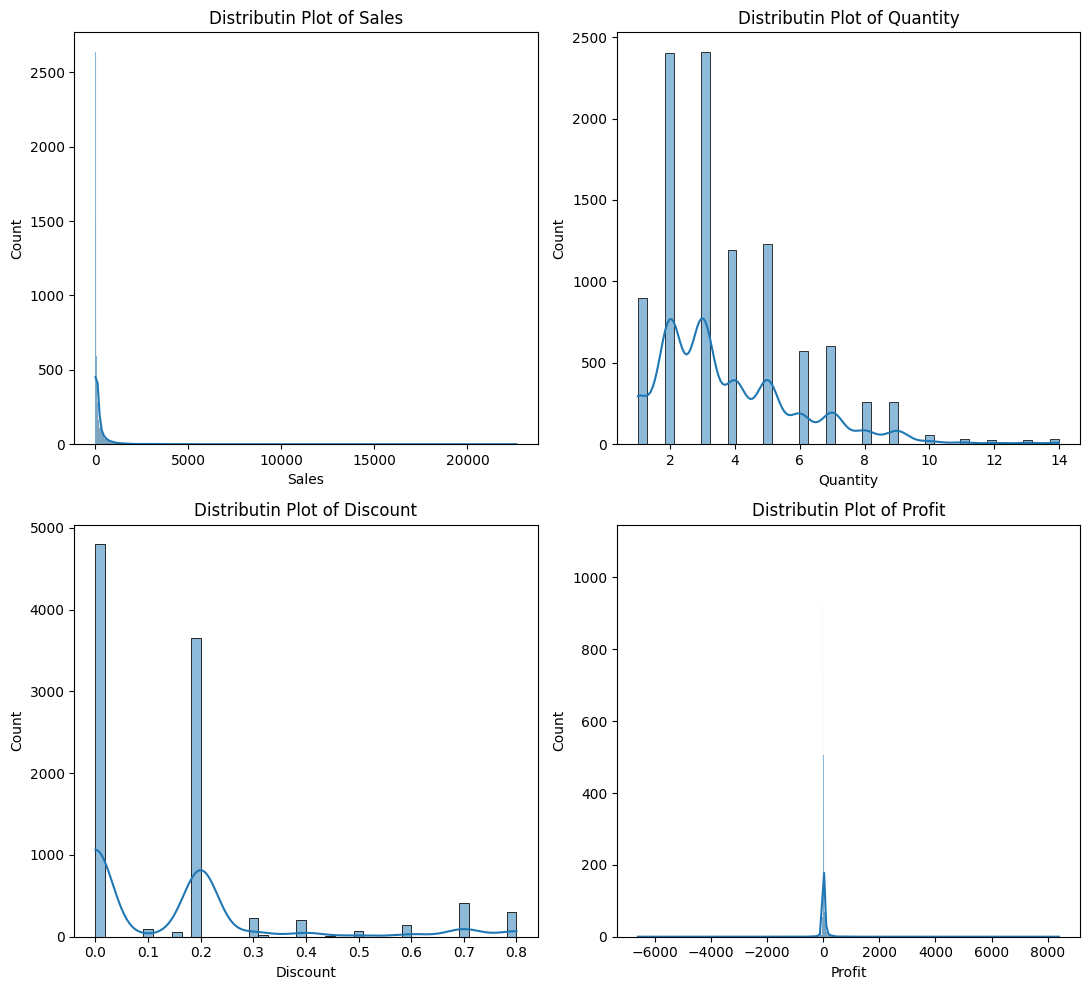

In [ ]:
plt.figure(figsize=(11,10))
for i,col in enumerate(numerical.columns,start=1):
  plt.subplot(2,2,i)
  sns.histplot(x=data[col],kde=True)
  plt.title(f"Distributin Plot of {col}")
plt.tight_layout()
plt.show()





*   **Sales plot** exhibits purchases clustered around 0,indicating smaller transaction amounts in general. While a straight line at zero indicates presence of outliers in data.
*   **Quantity plot** highlights the number of items bought usually falling between the range of 2 to 5.


*   **Discount** of 20% was most availed.
*   **Profits** appears to clsuter around zero , indicating not so profitable sales.





*Count Plot*

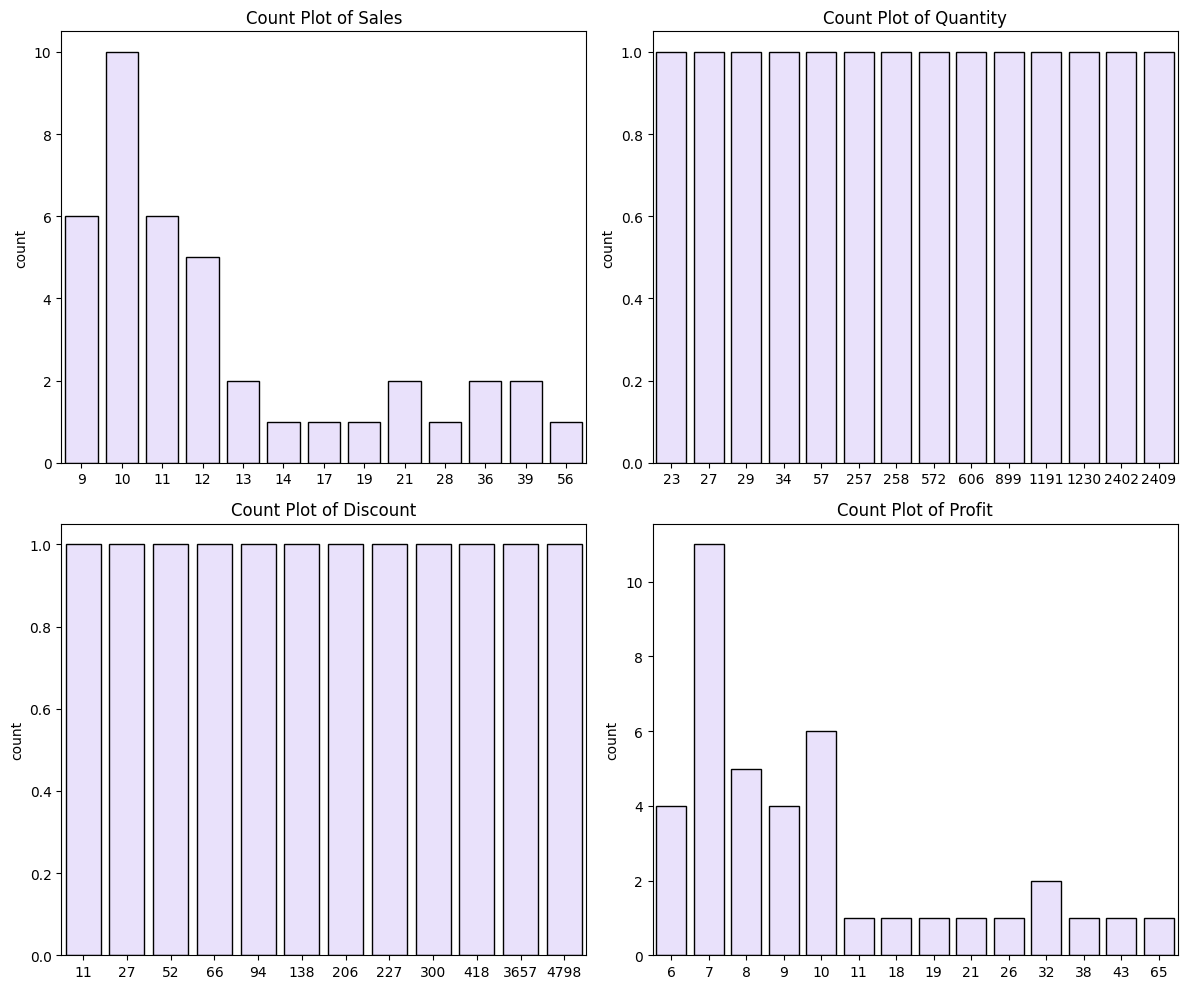

In [ ]:
plt.figure(figsize=(12,10))
for i,col in enumerate (numerical,start=1):
  plt.subplot(2,2,i)
  top_40_values=data[col].value_counts().head(40)
  sns.countplot(x=top_40_values.values,color="#E7DDFF",edgecolor="black")
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()



*Box Plot*

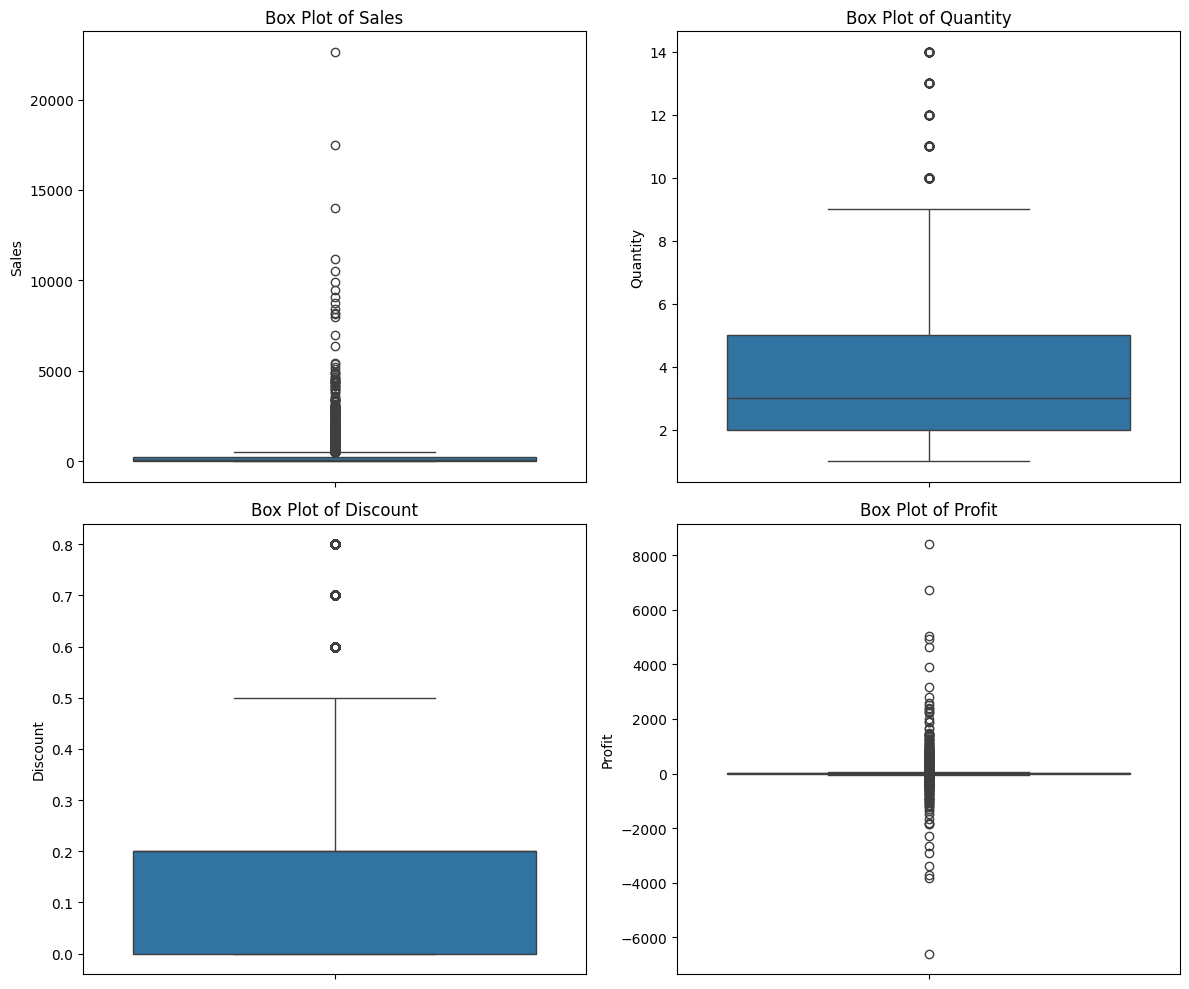

In [ ]:
plt.figure(figsize=(12,10))
for i,col in enumerate(numerical.columns,start=1):
  plt.subplot(2,2,i)
  sns.boxplot(y=data[col])
  plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

Univariate Analysis

 *Categorical Features:*

In [ ]:
categories=categories.drop(["Country","Ship Date","Customer Name"]) # Excluded 'Ship Date', 'Country' & 'Customer name ' Columns to avoid irrelevant analysis

In [ ]:
categories

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Segment', 'City',
       'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name'],
      dtype='object')

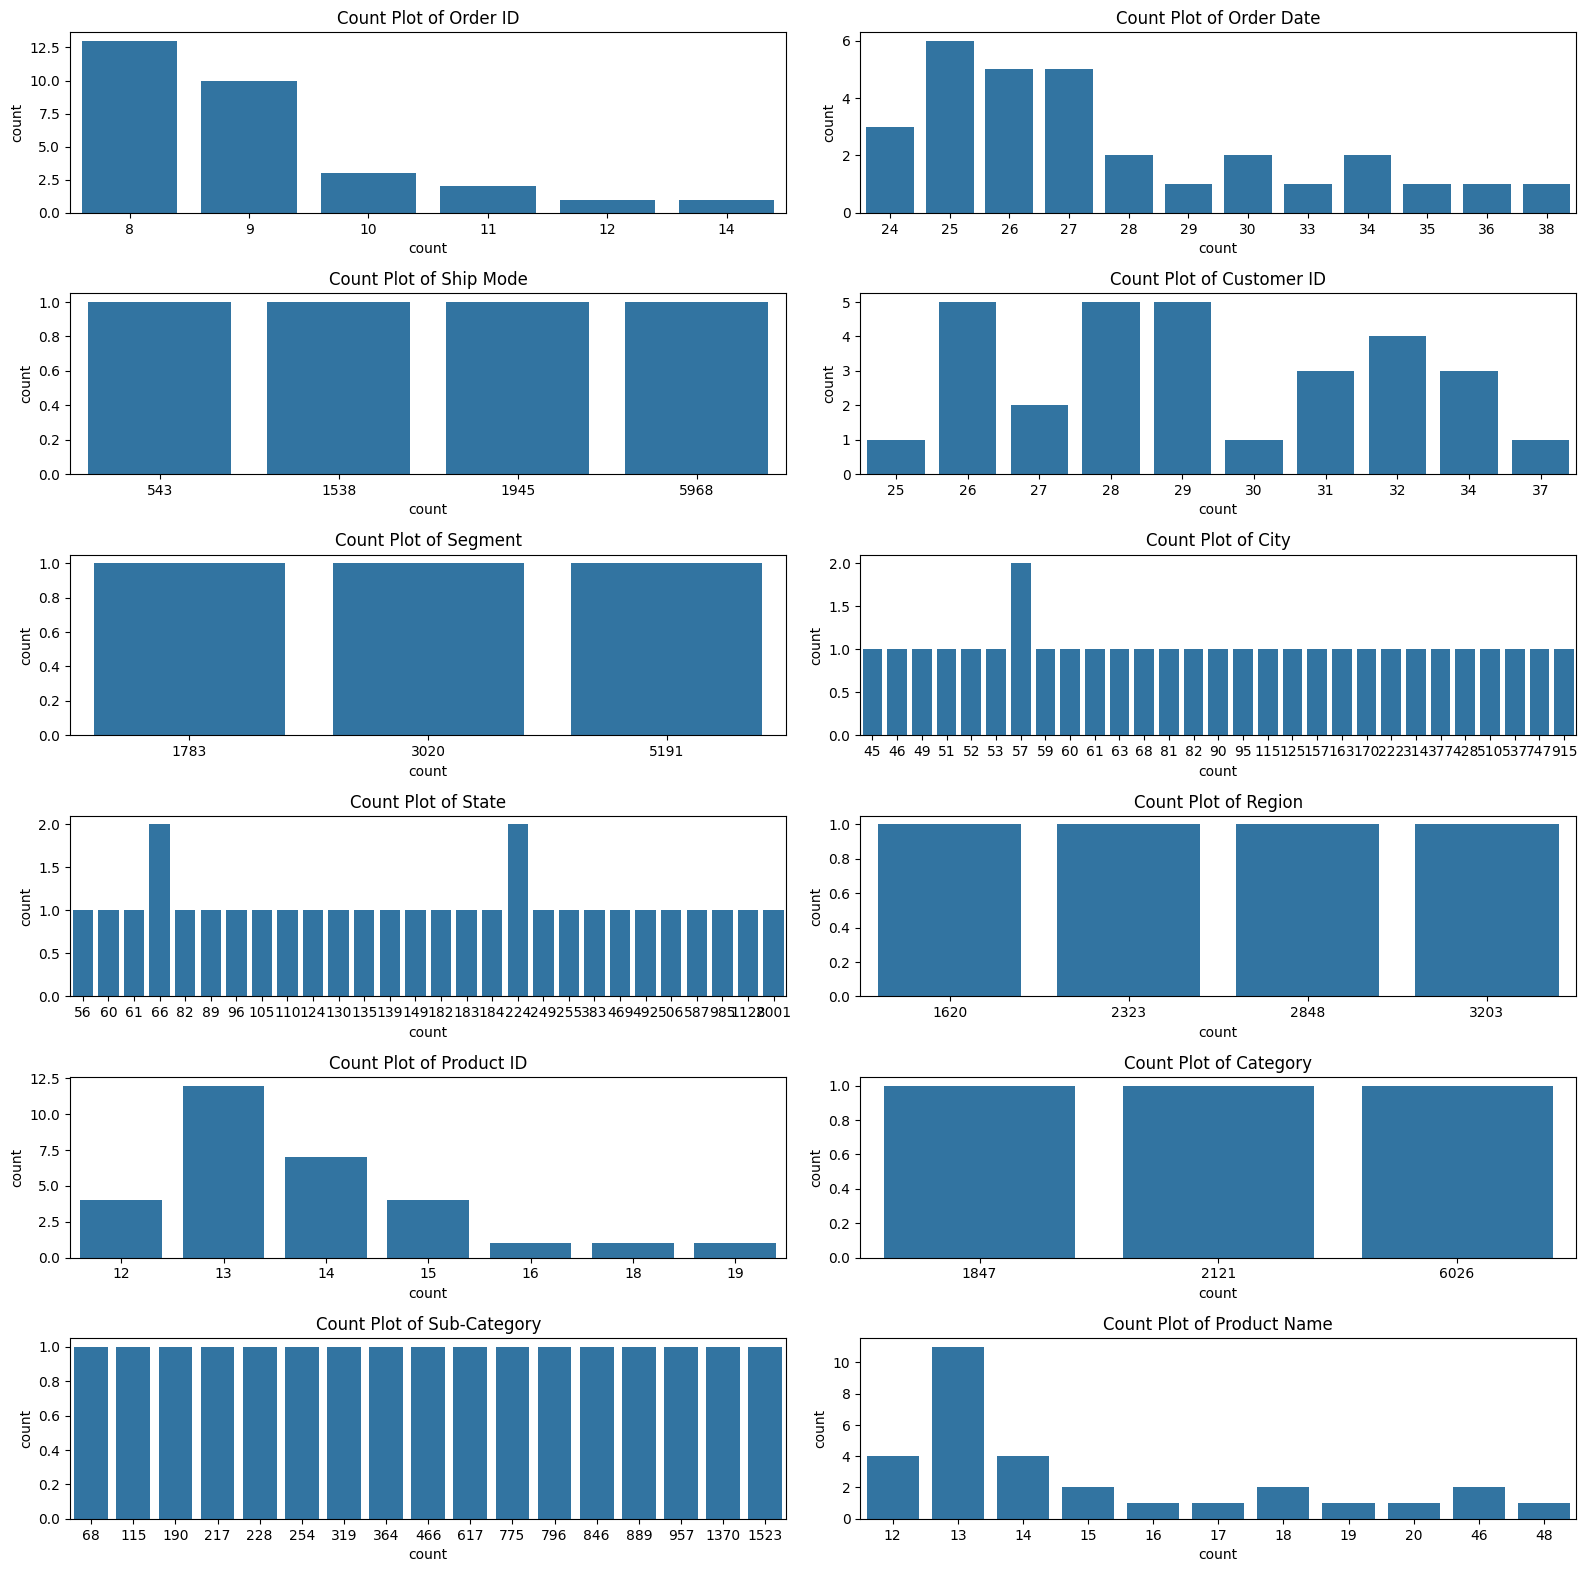

In [ ]:
plt.figure(figsize=(16,18))
for i,col in enumerate (categories,start=1):
  plt.subplot(7,2,i)
  top_30_values=data[col].value_counts().head(30)
  sns.countplot(x=top_30_values)
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

**Bivariate Analysis:**

*Sales vs Category/ Sub Category :*

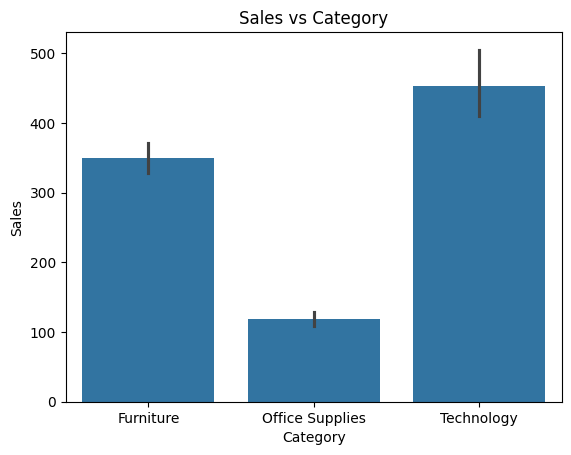

In [ ]:
sns.barplot(x=data["Category"],y=data["Sales"])
plt.title("Sales vs Category")
plt.show()

Technology is the most sold category with Furniture trailing in  solid second place. Office Supplies however are least in demand



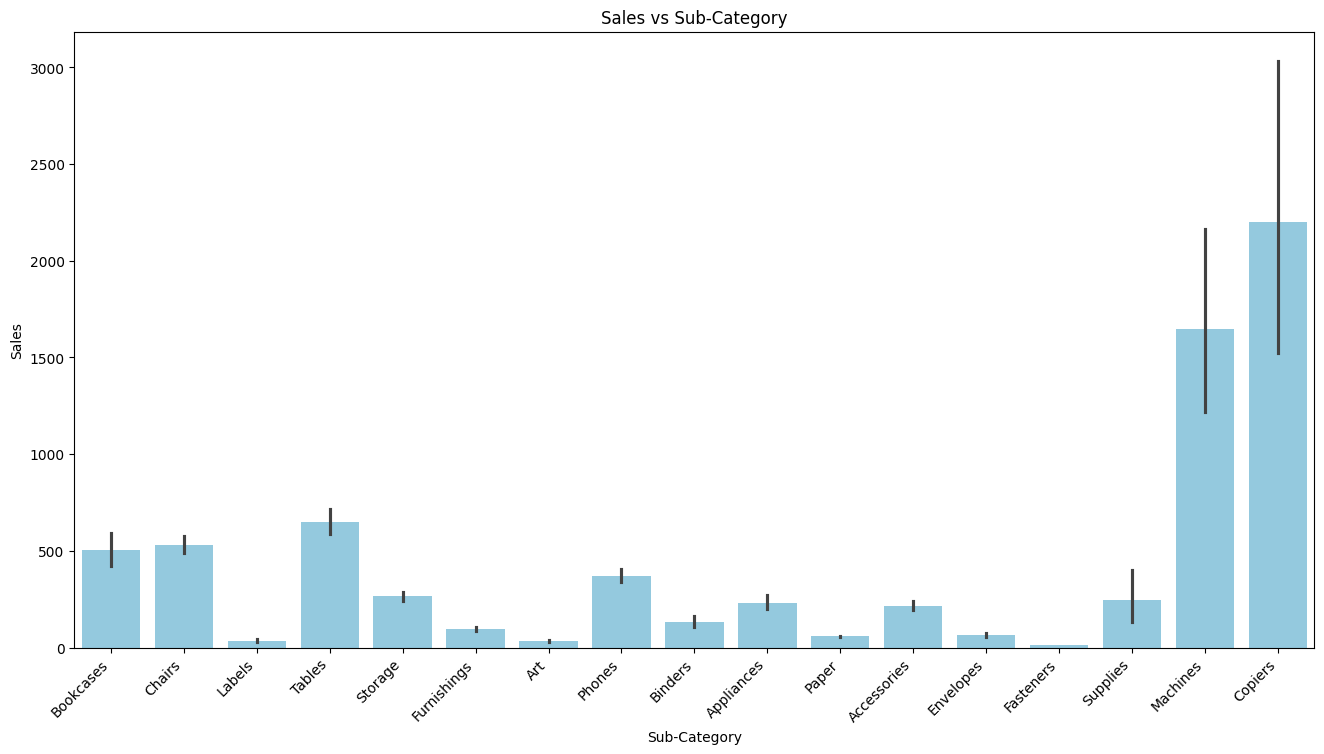

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=data["Sub-Category"],y=data["Sales"],color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("Sales vs Sub-Category")
plt.show()

Copiers and Machines are leading in units sold.

*Profit vs Discount:*

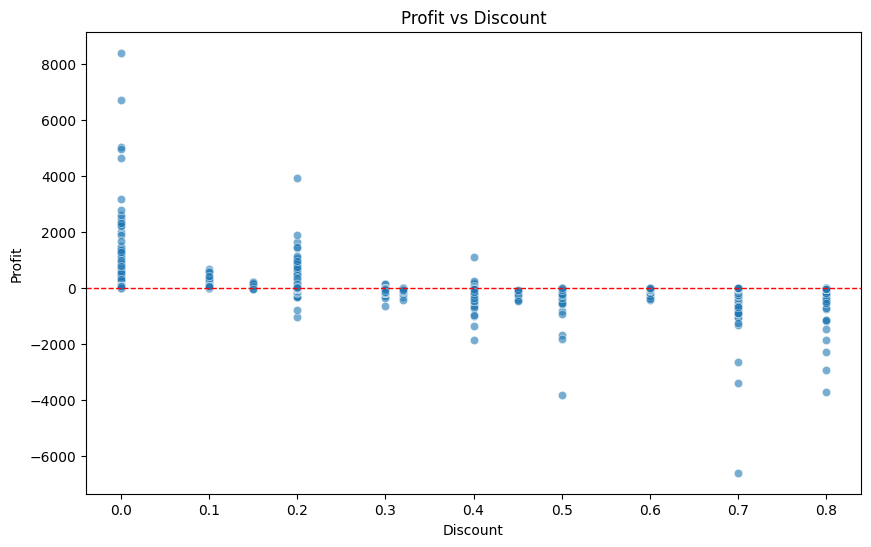

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Discount', y='Profit', alpha=0.6)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # zero-profit line
plt.show()

Predictable pattern of profits is observed here,higher the discount ,lower the profit is.Profit devalued to negatives at max discount.

*Profit vs Sales:*

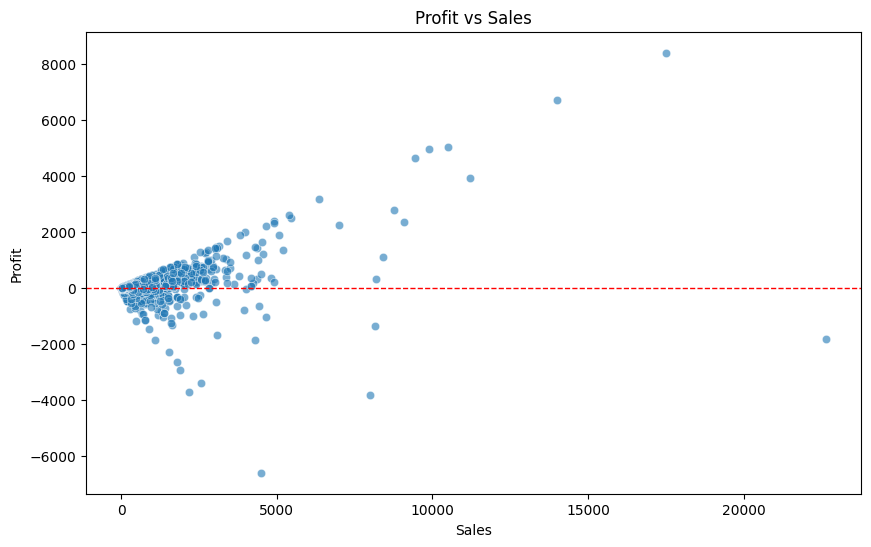

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Sales', y='Profit', alpha=0.6)
plt.title('Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

Lower sales were accompanied by consistently low profits. Profits soared high when the sales was ranging between 15000-20000.

Profit vs Category / Sub-Category:

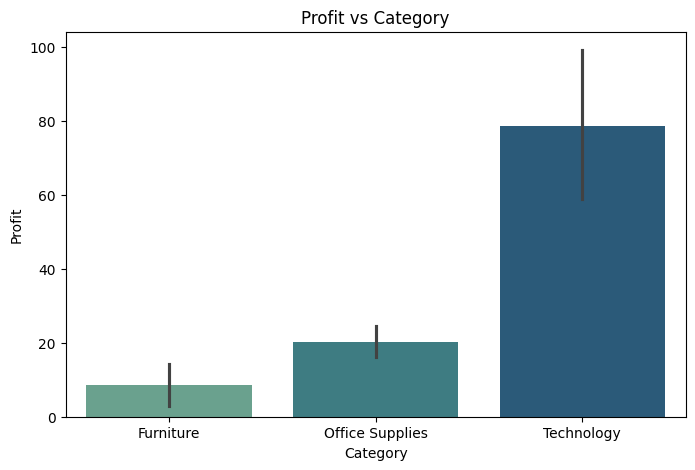

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Category'], y=data['Profit'],hue=data['Category'],  palette='crest')
plt.title('Profit vs Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()



Technology brought the bigger cut of profit,thus leading both in Sales and Profits.

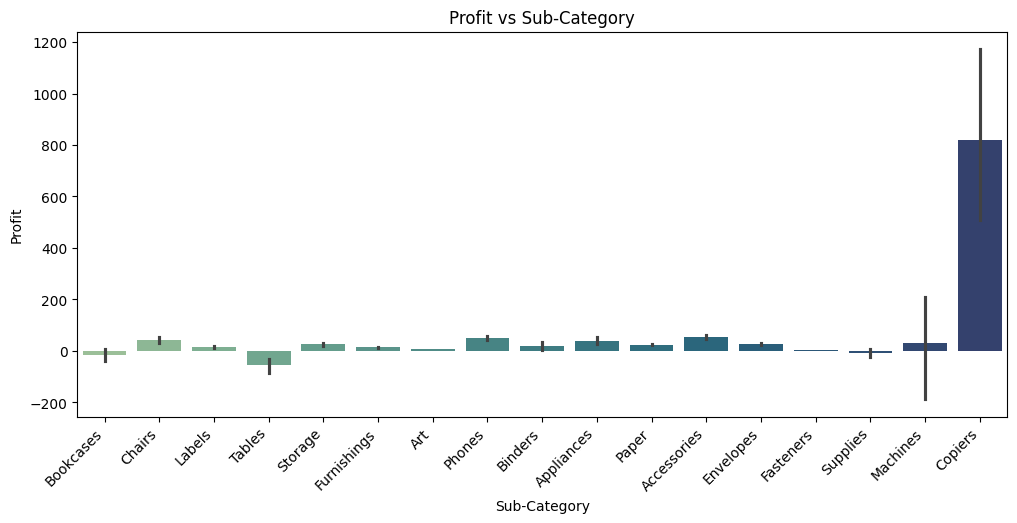

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Sub-Category'], y=data['Profit'],hue=data['Sub-Category'],  palette='crest')
plt.title('Profit vs Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit')
plt.show()

Copiers acquired the most profits among all sub-categories.

*Profit vs Segment:*

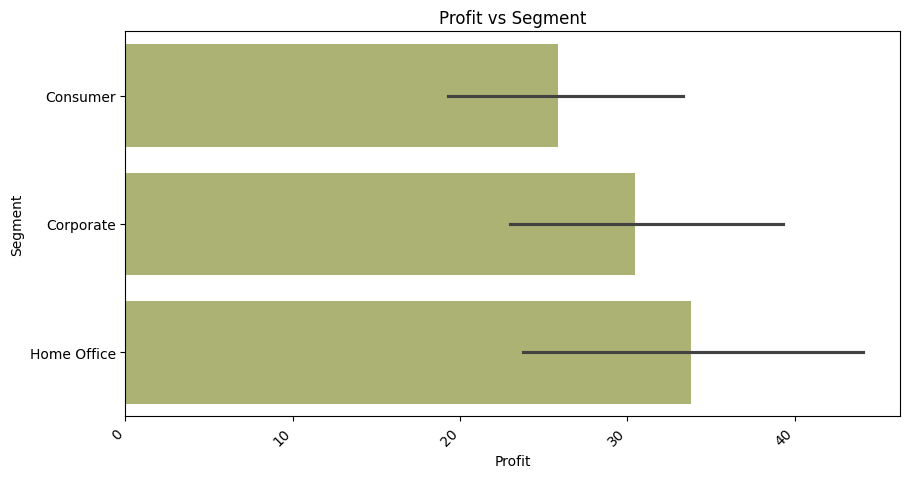

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data["Profit"],y=data["Segment"],color="#B5BD68")
plt.xticks(rotation=45, ha='right')
plt.title("Profit vs Segment")
plt.xlabel("Profit")
plt.ylabel("Segment")
plt.show()

Home Office segment generated the most profits,followed by Corporate.

*Profit vs Region / State:*

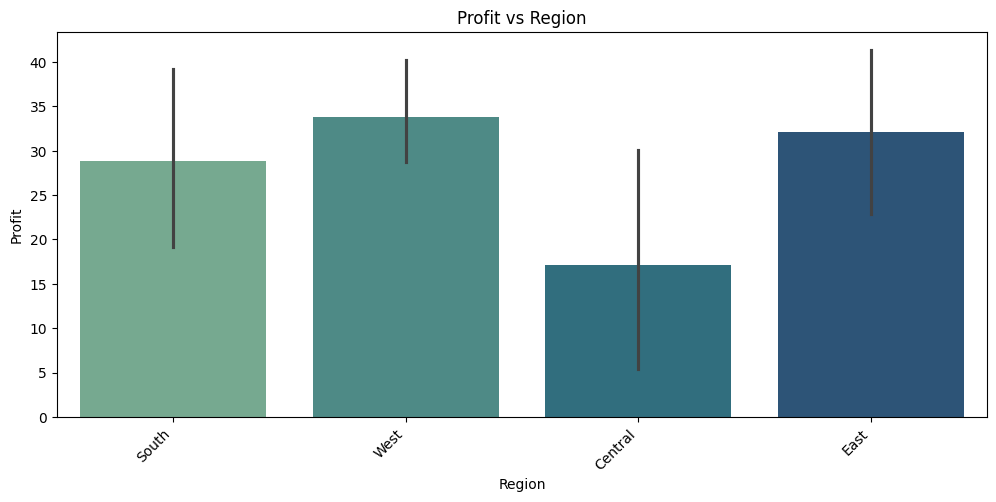

In [ ]:

plt.figure(figsize=(12,5))
sns.barplot(x=data["Region"],y=data["Profit"],hue=data["Region"],palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Profit vs Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

West and East Region generated the most profit with South leading closely behind.

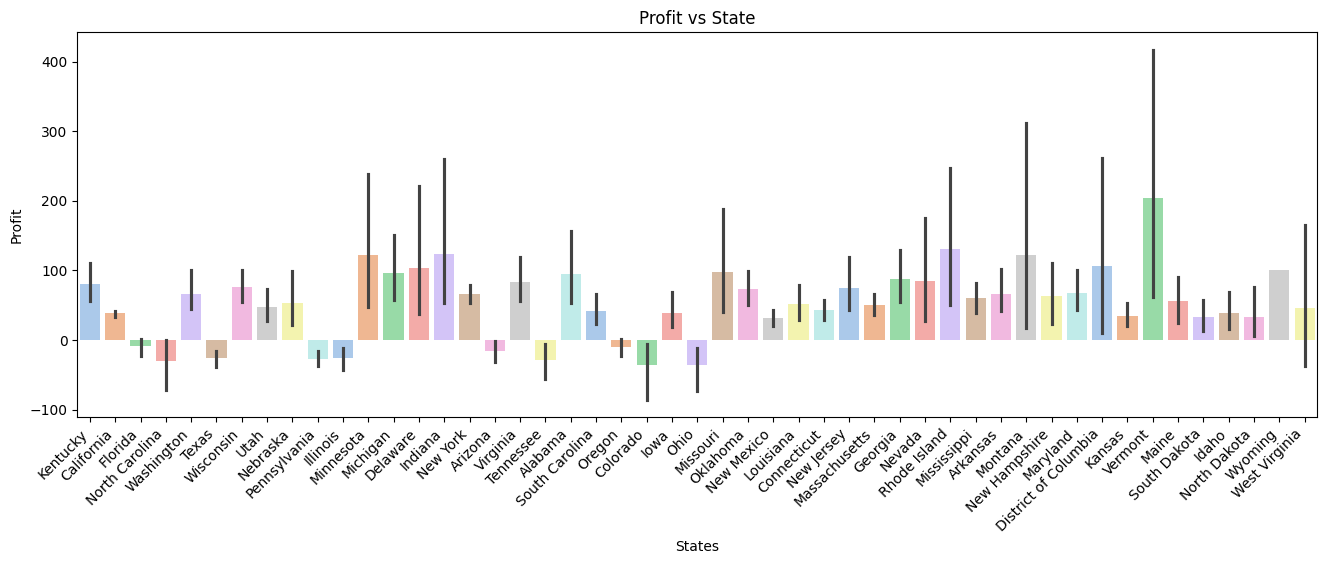

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=data["State"],y=data["Profit"],hue=data["State"],palette="pastel")
plt.xticks(rotation=45, ha='right')
plt.title("Profit vs State")
plt.xlabel("States")
plt.ylabel("Profit")
plt.show()

Maine is the leading contributor state in profits among other states.

*Profit vs Ship Mode:*

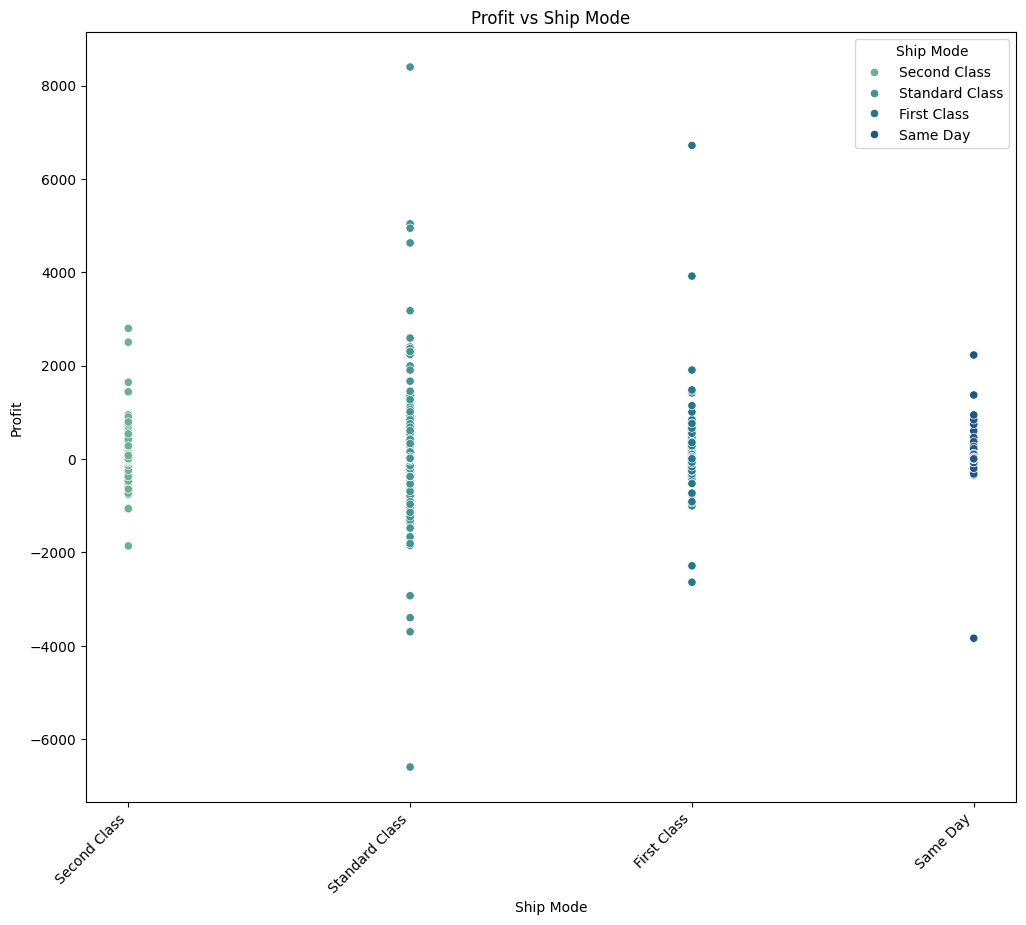

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=data["Ship Mode"],y=data["Profit"],hue=data["Ship Mode"],palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Profit vs Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

The most profitable shipping mode appears to be Standard Class. First Class holds solid second place.

*Profit vs Quantity:*

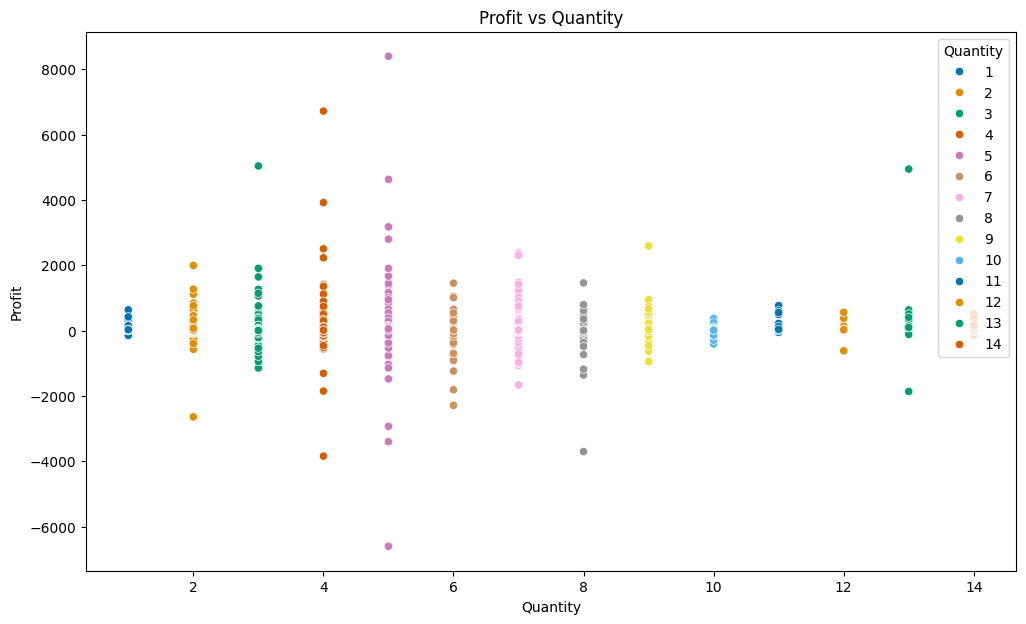

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=data["Quantity"],y=data["Profit"],hue=data["Quantity"],palette="colorblind")
plt.title("Profit vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.show()

Profit remained considerably high in sales qunatity between 4 to 6.

*Profit vs Product Name:*
( Top 15 product names by profit since the list of names is extensive and will not present a readable graph)

<ipython-input-72-88ed64c6619d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='crest')


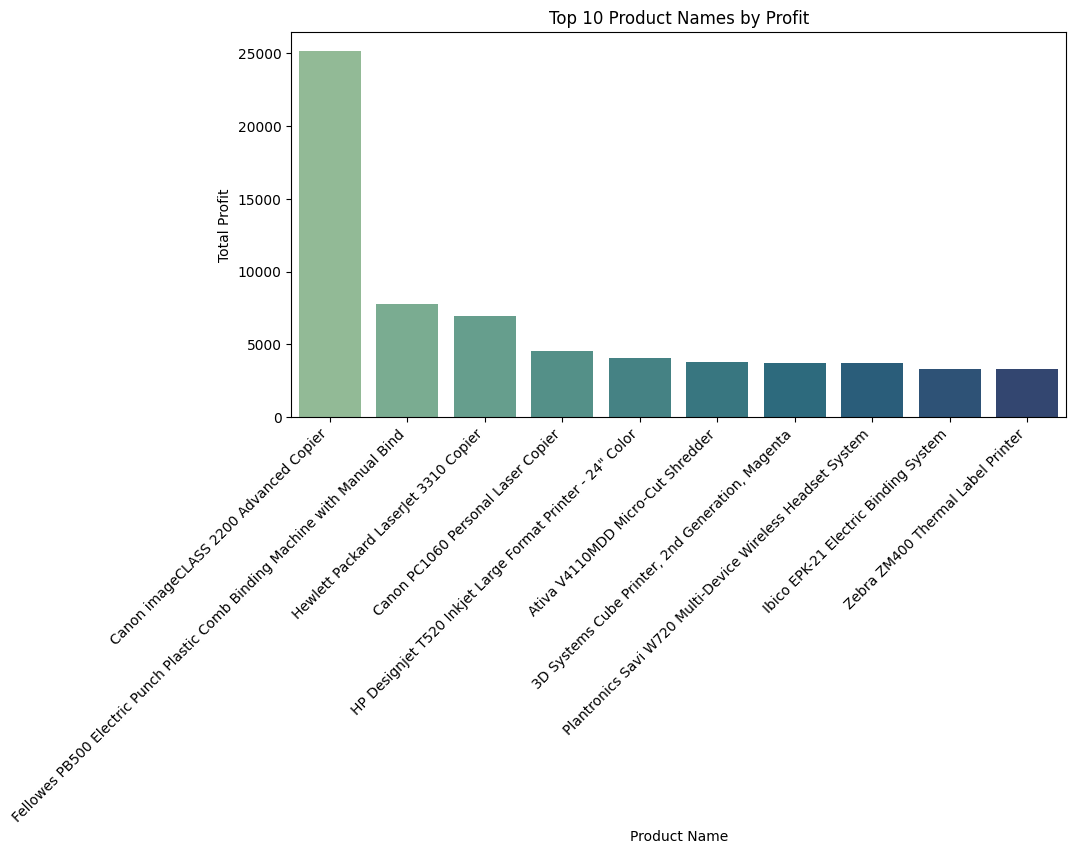

In [ ]:
top_10_products = data.groupby('Product Name')['Profit'].sum().nlargest(10)
plt.figure(figsize=(10, 5))

sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Names by Profit')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.show()

Top

*Profit vs Time (Month/Year):*

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date']) # Converted order date into correct date time format
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
data['Month'] = data['Order Date'].dt.month        # Numeric month
data['Month_Name'] = data['Order Date'].dt.strftime('%B')  # Full month name
data['Year'] = data['Order Date'].dt.year

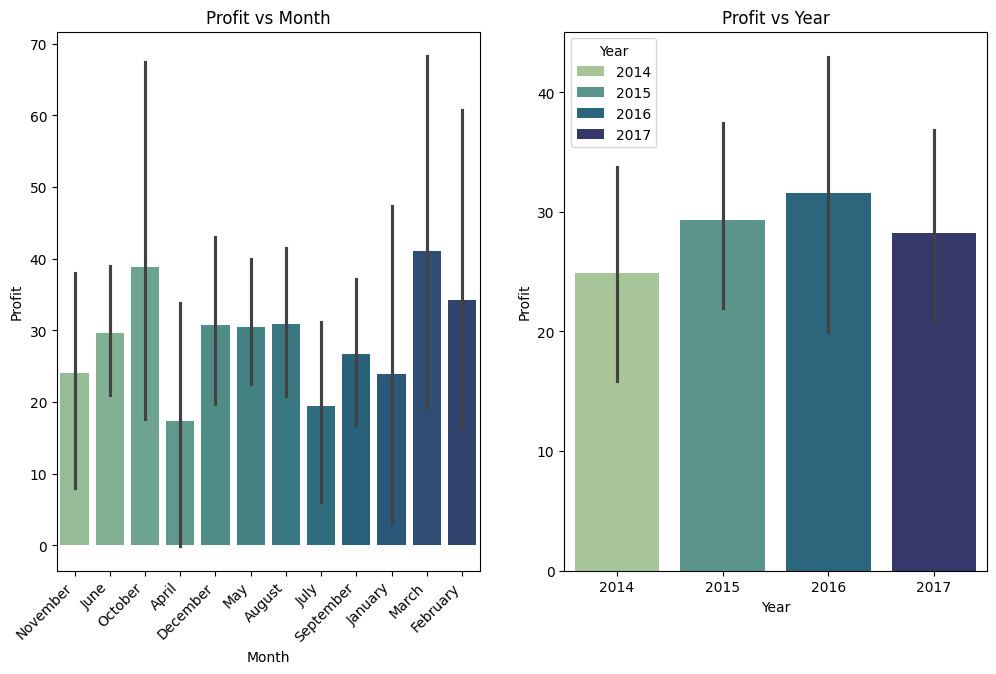

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.barplot(x=data["Month_Name"],y=data["Profit"],hue=data["Month_Name"],palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Profit vs Month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.subplot(1,2,2)
sns.barplot(x=data["Year"],y=data["Profit"],hue=data["Year"],palette="crest")
plt.title("Profit vs Year")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.show()

Profits maintained at high during October and March,while 2016 appeared to be the most successful year in terms of Profits.

**Multivariate Analysis:**

*Segment + Region vs Profit:*

Identifying high-performing segments within each
region.

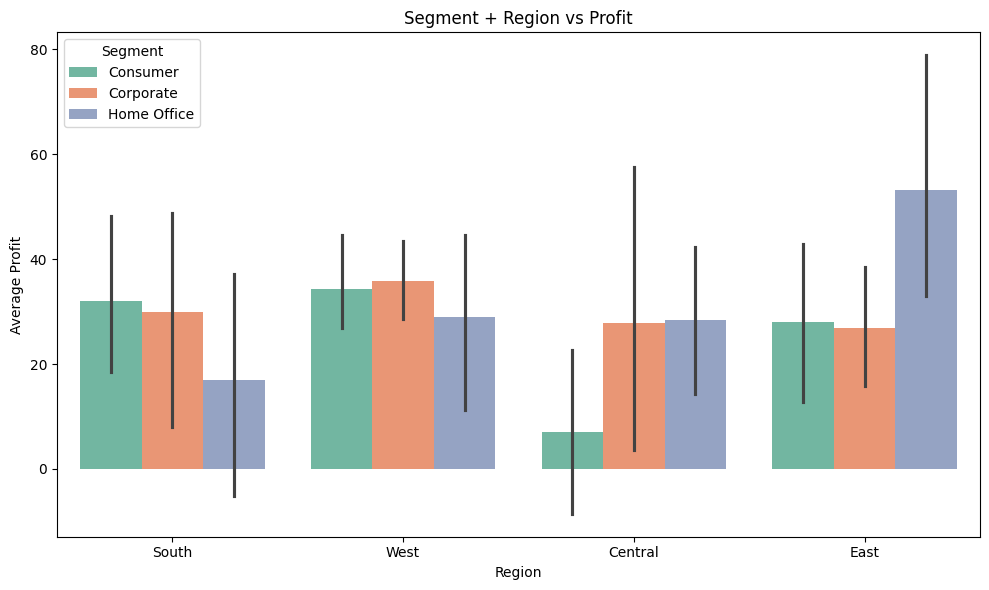

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Region', y='Profit', hue='Segment', palette='Set2')
plt.title("Segment + Region vs Profit")
plt.ylabel("Average Profit")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

Segments generating the highest profits in the following regions:


*   **South**: Consumer
*   **West**:  Corporate
*   **Central**: Home Office
*  **East**: Home Office





*Category + Region vs Profit :*

To find which sub-categories are strong in each region.

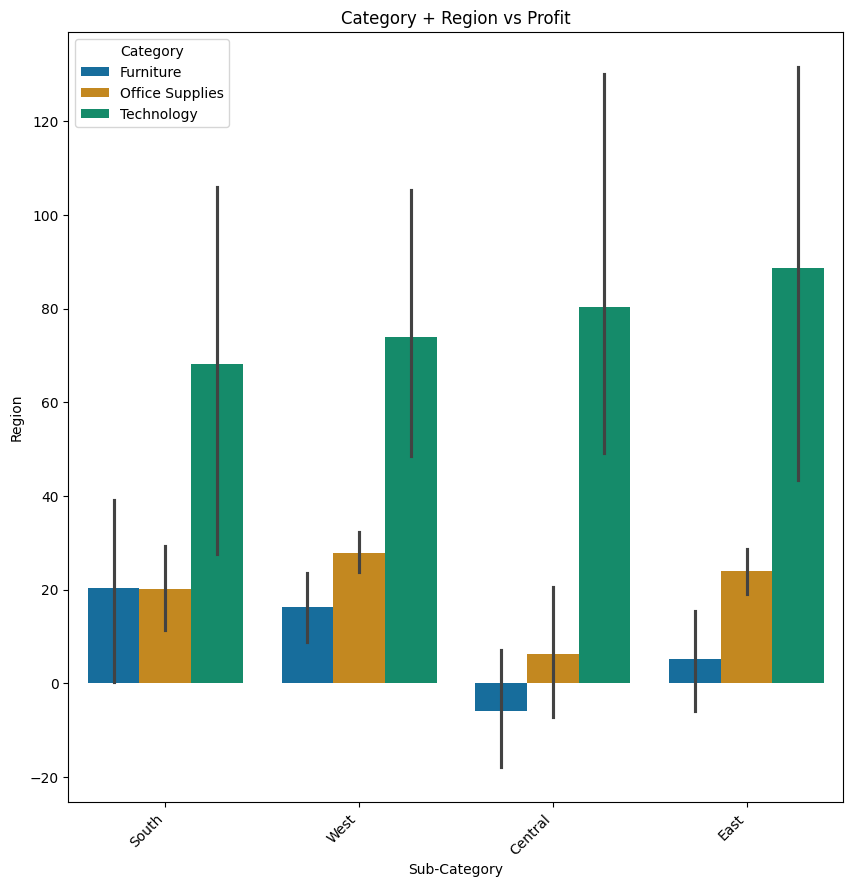

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='Region', y='Profit', hue='Category', palette='colorblind')
plt.title("Category + Region vs Profit")
plt.ylabel("Region")
plt.xlabel("Sub-Category")
plt.xticks(rotation=45, ha='right')

plt.show()

Leading Categories Region wise:


*   **South**: Technology
*   **West** : Technology
*   **Central** : Technology
*  **East** : Technology



*Pairplot of Sales, Profit, Discount, and Quantity*

To explore interactions across numerical features. Spot patterns,
correlations, and outliers across different business segments or product
categories.

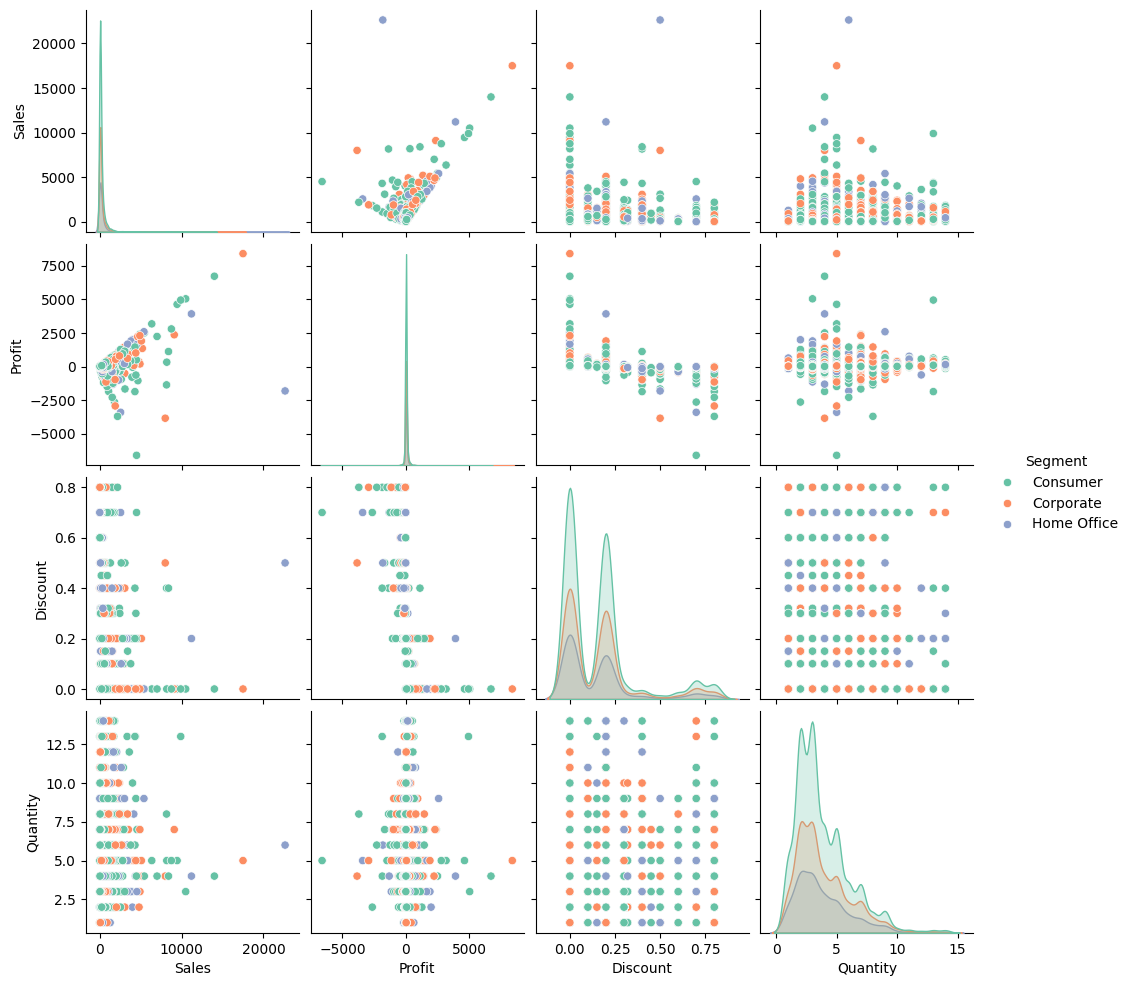

In [ ]:
sns.pairplot(data, vars=['Sales', 'Profit', 'Discount', 'Quantity'],hue='Segment', palette='Set2', diag_kind='kde')
plt.show()


*Time (Year) + Category vs Profit:*

 Analyze seasonal or time-based
trends in category-level performance.

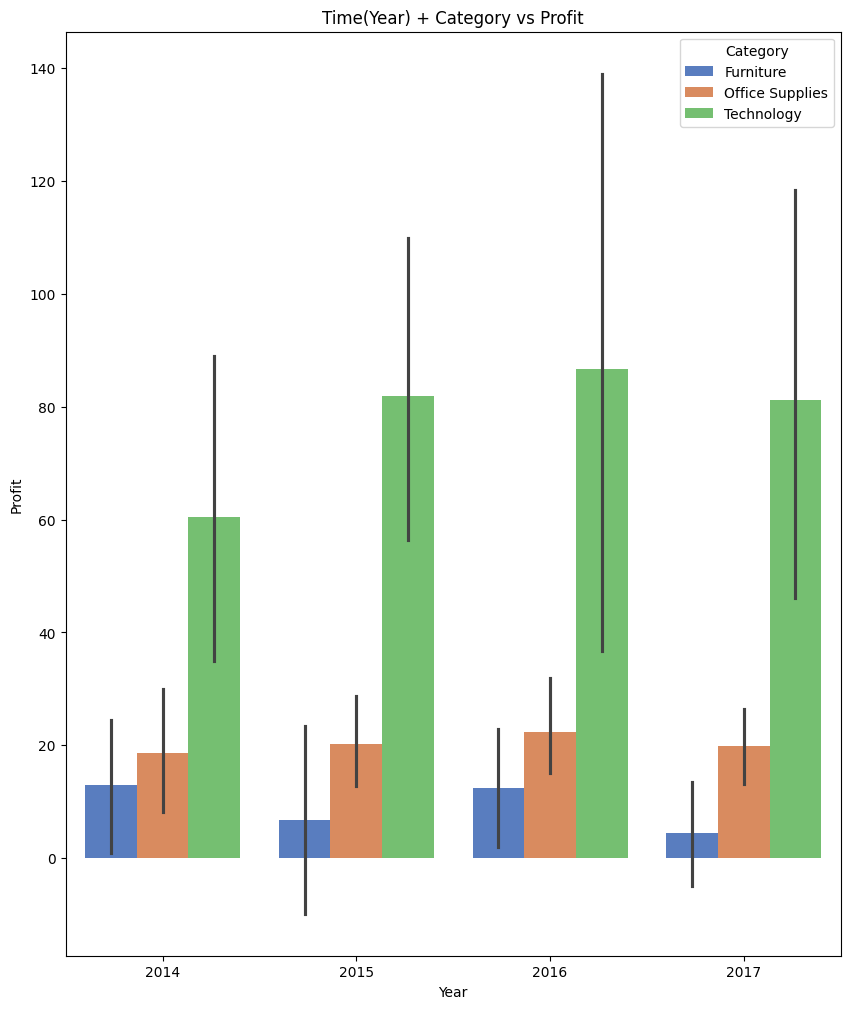

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(data=data,x='Year',y="Profit",hue="Category",palette="muted")
plt.title("Time(Year) + Category vs Profit")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.show()

Technology is the leading/ most sold and most profitable category throughout the respective years of sales,thus making it the star category in all the regions as well.

*Segment + Ship Mode vs Sales/Profit:*

To Understand how different segments use
shipping methods and their associated performance.

In [ ]:
grouped = data.groupby(['Segment', 'Ship Mode'])[['Sales', 'Profit']].sum().reset_index()

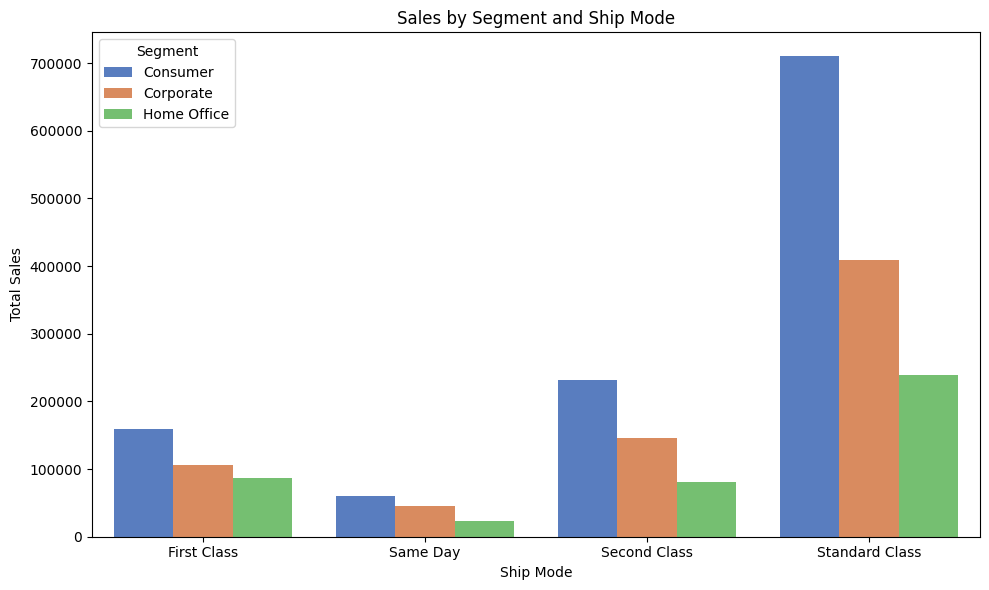

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Ship Mode', y='Sales', hue='Segment', palette='muted')
plt.title("Sales by Segment and Ship Mode")
plt.ylabel("Total Sales")
plt.xlabel("Ship Mode")
plt.tight_layout()
plt.show()

**Standard Class** was the most preferred shipping mode among customers ,while the **Customer** segment appeared to be the most popular sector of demand.

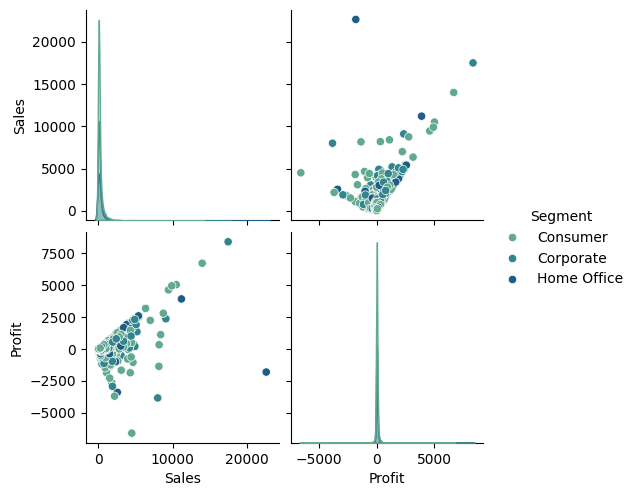

In [ ]:
sns.pairplot(data,vars=['Sales','Profit'],hue="Segment",palette="crest")
plt.show()

** Correlation Analysis:**

*Heat Map*

In [ ]:
correlation_matrix = data.drop(columns=['Postal Code']).corr(numeric_only=True)



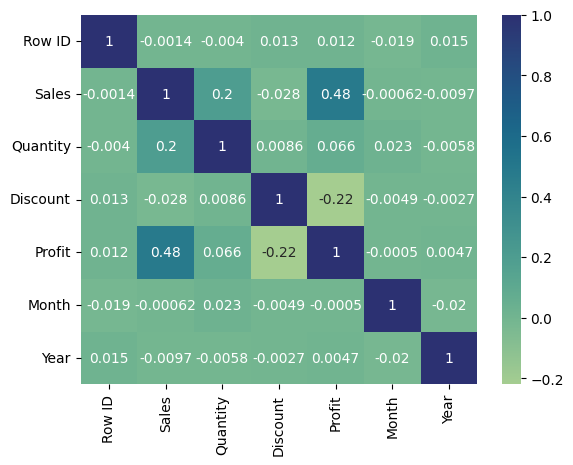

In [ ]:
sns.heatmap(correlation_matrix,annot=True,cmap="crest")
plt.show()


***Brief Overview of Numerical Data Correlation**

1.   Sales and Porfits are directly correlated as in most cases.
     However,overall sales over years have neither improved nor increased.
2.   Higher discounts had a declining impact on profits.

3. Qunaity of items sold appears to be dwindling over the years.





**Outlier Detection:**

In [ ]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
outliers = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]
outliers

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Month_Name,Year
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,November,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,October,2015
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,6,June,2014
10,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,6,June,2014
11,12,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,9932,CA-2015-104948,2015-11-13,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960,11,November,2015
9942,9943,CA-2014-143371,2014-12-28,1/3/2015,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,...,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.8200,9,0.00,29.9646,12,December,2014
9947,9948,CA-2017-121559,2017-06-01,6/3/2017,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,6,June,2017
9948,9949,CA-2017-121559,2017-06-01,6/3/2017,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.2000,8,0.00,793.7160,6,June,2017


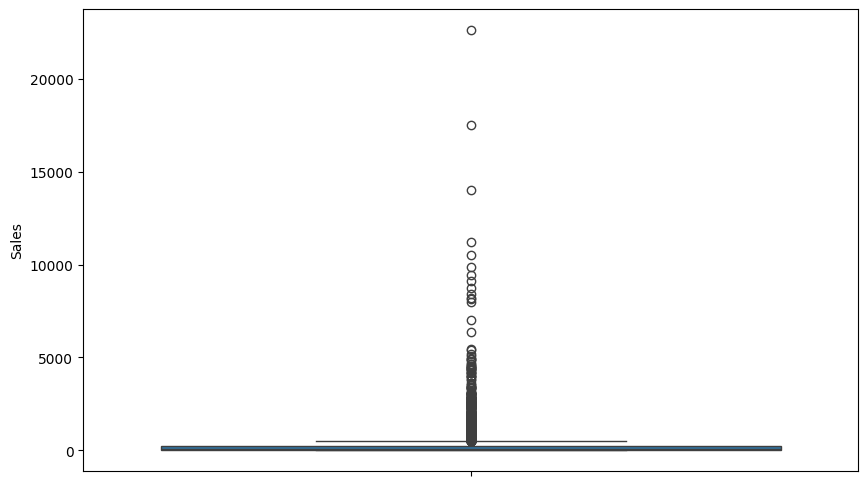

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y='Sales')
plt.show()

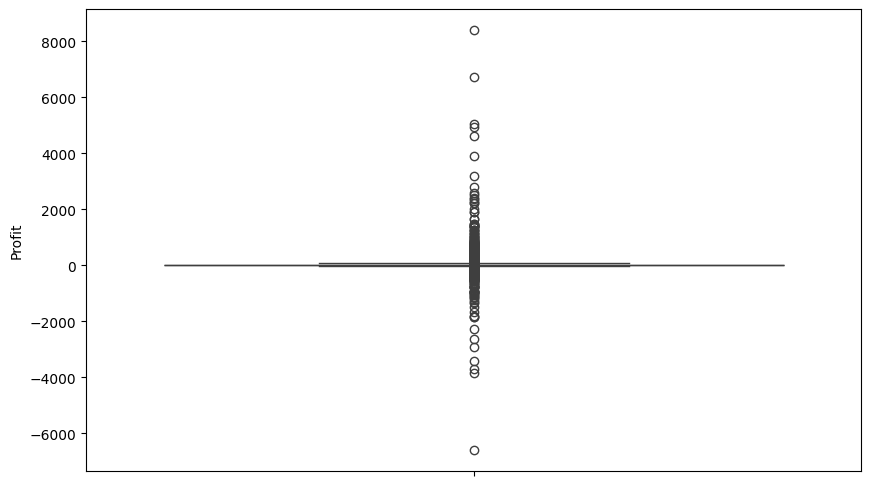

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y='Profit')
plt.show()

**Conditional Analysis:**

*1.What percentage of orders come from each segment and region?*

In [ ]:
orders=data.groupby(['Segment','Region']).size().reset_index(name='Order Count')
total_orders=orders['Order Count'].sum()
orders['Order Percentage']=(orders['Order Count']/total_orders)*100
orders['Order Percentage']=orders['Order Percentage'].round(2)
orders

,Segment,Region,Order Count,Order Percentage
0,Consumer,Central,1212,12.13
1,Consumer,East,1469,14.70
2,Consumer,South,838,8.39
3,Consumer,West,1672,16.73
4,Corporate,Central,673,6.73
5,Corporate,East,877,8.78
6,Corporate,South,510,5.10
7,Corporate,West,960,9.61
8,Home Office,Central,438,4.38
9,Home Office,East,502,5.02


*What are the average sales and profit per segment across different regions?*

In [ ]:
sales=data.groupby(['Segment','Region'])['Sales'].mean().reset_index(name='Average Sales')
sales["Average Sales"]=sales["Average Sales"].round(2)
sales["Avearge Profit"]=(data["Profit"].mean()).round(2)
sales

,Segment,Region,Average Sales,Avearge Profit
0,Consumer,Central,207.95,28.66
1,Consumer,East,238.88,28.66
2,Consumer,South,233.39,28.66
3,Consumer,West,217.03,28.66
4,Corporate,Central,234.76,28.66
5,Corporate,East,228.52,28.66
6,Corporate,South,238.99,28.66
7,Corporate,West,235.27,28.66
8,Home Office,Central,208.25,28.66
9,Home Office,East,253.91,28.66


*How does discount level affect profitability across different categories?*

In [ ]:
profits=data.groupby(['Category','Profit'])['Discount'].sum().reset_index(name='Discount')
profits



,Category,Profit,Discount
0,Furniture,-1862.3124,0.4
1,Furniture,-1665.0522,0.5
2,Furniture,-1002.7836,0.4
3,Furniture,-968.8833,0.4
4,Furniture,-814.4832,0.5
...,...,...,...
7399,Technology,2799.9840,0.0
7400,Technology,3919.9888,0.2
7401,Technology,5039.9856,0.0
7402,Technology,6719.9808,0.0


*What percentage of high discount orders (>30%) result in negative profit?*

In [ ]:
high_discount_orders = data[data['Discount'] > 0.3]

negative_profit = (high_discount_orders['Profit'] < 0).sum()

total_high_discount_orders = len(high_discount_orders)

negative_profit = (negative_profit/ total_high_discount_orders) * 100

negative_profit = round(negative_profit, 2)

print(f"Percentage of high discount orders that resulted in negative profit: {negative_profit}%")



Percentage of high discount orders that resulted in negative profit: 97.77%


*What percentage of customers are repeat buyers, and how do they differ in spending
patterns?*

In [ ]:

purchase_counts= data['Customer ID'].value_counts()

repeat_customers = purchase_counts[purchase_counts > 1].index
repeat = data[data['Customer ID'].isin(repeat_customers)]
one_time = data[data['Customer ID'].isin(repeat_customers)]


total_customers = data['Customer ID'].nunique()
repeat_count = len(repeat_customers)
repeat_percentage = (repeat_count / total_customers) * 100
avg_spend_repeat = repeat.groupby('Customer ID')['Sales'].sum().mean()
avg_spend_one_time = one_time.groupby('Customer ID')['Sales'].sum().mean()


print(f"Number of repeat customers: {repeat_count}")
print(f"Percentage of repeat customers: {repeat_percentage: .2f}%")
print(f"Average spending of repeat customers: ${avg_spend_repeat:.2f}")
print(f"Average spending of one-time customers: ${avg_spend_one_time:.2f}")

Number of repeat customers: 788
Percentage of repeat customers:  99.37%
Average spending of repeat customers: $2913.84
Average spending of one-time customers: $2913.84


*Which sub-categories have the highest loss percentage compared to sales?*

In [ ]:
data['Loss'] = np.where(data['Profit'] < 0, -data['Profit'], 0)
subcategory = data.groupby('Sub-Category')[['Sales', 'Loss']].sum()
subcategory['Loss Percentage']=(subcategory['Loss'] / subcategory['Sales']) * 100

subcategory= subcategory.sort_values('Loss Percentage', ascending=False)

print(subcategory[['Loss Percentage']])

              Loss Percentage
Sub-Category                 
Binders             18.932196
Machines            15.915708
Tables              15.660650
Bookcases           10.578174
Appliances           8.025172
Furnishings          7.078024
Supplies             6.461096
Chairs               3.008333
Storage              2.870890
Phones               2.281958
Fasteners            1.097623
Accessories          0.555995
Art                  0.000000
Envelopes            0.000000
Copiers              0.000000
Paper                0.000000
Labels               0.000000


*What is the probability of receiving a profit/loss given a discount rate?*

In [ ]:
data['Profit-Chances'] = data['Profit'].apply(lambda x: 1 if x > 0 else 0)

probability = data.groupby('Discount')['Profit-Chances'].agg(
    Profit_Prob=lambda x: (x == 1).mean(),
    Loss_Prob=lambda x: (x == 0).mean()
).reset_index()


print(probability.sort_values('Discount'))

    Discount  Profit_Prob  Loss_Prob
0       0.00     0.993747   0.006253
1       0.10     0.957447   0.042553
2       0.15     0.673077   0.326923
3       0.20     0.856713   0.143287
4       0.30     0.026432   0.973568
5       0.32     0.000000   1.000000
6       0.40     0.126214   0.873786
7       0.45     0.000000   1.000000
8       0.50     0.000000   1.000000
9       0.60     0.000000   1.000000
10      0.70     0.000000   1.000000
11      0.80     0.000000   1.000000


*Among unprofitable orders, which categories or regions dominate?*

In [ ]:
loss = data[data['Profit'] < 0]

category_loss = loss['Category'].value_counts()


region_loss = loss['Region'].value_counts()


print("\n Unprofitable Orders by Category:")
print(category_loss)

print("\nUnprofitable Orders by Region:")
print(region_loss)


 Unprofitable Orders by Category:
Category
Office Supplies    886
Furniture          714
Technology         271
Name: count, dtype: int64

Unprofitable Orders by Region:
Region
Central    741
East       553
West       318
South      259
Name: count, dtype: int64


*What is the average delivery delay (Ship Date - Order Date), and does it impact
customer segments or product types?*

In [ ]:

data['Delayed'] = (data['Ship Date'] - data['Order Date']).dt.days

avg_delay = data['Delayed'].mean()
print(f"Average Delivery Delay: {avg_delay:.2f} days")

segment_delay = data.groupby('Segment')['Delayed'].mean().sort_values(ascending=False)
print("\n Average Delay by Segment:")
print(segment_delay)


category_delay = data.groupby('Category')['Delayed'].mean().sort_values(ascending=False)
print("\n Average Delay by Category:")
print(category_delay)



Average Delivery Delay: 3.96 days

 Average Delay by Segment:
Segment
Corporate      4.007616
Consumer       3.941822
Home Office    3.922042
Name: Delayed, dtype: float64

 Average Delay by Category:
Category
Office Supplies    3.983405
Technology         3.923119
Furniture          3.917020
Name: Delayed, dtype: float64


*Is there a strong segment that performs consistently across all regions?*

Consumer performed well in 3 out of 4 regions,followed by corporate

In [ ]:
segment_performance = data.groupby(['Segment', 'Region'])['Profit'].sum().reset_index()

segment_pivot = segment_performance.pivot(index='Segment', columns='Region', values='Profit')
segment_pivot

Region,Central,East,South,West
Segment,,,,
Consumer,8564.0481,41190.9843,26913.5728,57450.6040
Corporate,18703.9020,23622.5789,15215.2232,34437.4299
Home Office,12438.4124,26709.2168,4620.6343,16530.4150


*Are there any sub-categories that are profitable despite high discounting?*

In [ ]:
discount_threshold= 0.20

high_discount = data[data['Discount'] > discount_threshold]

sub_category_profits  = high_discount.groupby('Sub-Category')['Profit'].sum().reset_index()

profitable_sub_categories = sub_category_profits[sub_category_profits['Profit'] > 0]

print("Profitable Sub-Categories Despite High Discounts: \n ", profitable_sub_categories)

Profitable Sub-Categories Despite High Discounts: 
    Sub-Category     Profit
4      Copiers  2182.9752


# **Actionable Insights & Recommendations:**

**Negative Correlation Between Discounts & Profit**

   After evaluating sales trends and assessing it's pattern in relation to provided discounts,It is determined that higher discounts are bringing down the sales,thus a more strategic approach is required to plan discounts during peak sales seasons or use of productive reach-out methods to boost sales.

**Profitable Segments**

  Consumer segment remained consistent in generating most profits through all regions. Both Consumer and Corporate segments require  exhaustive startegies to further market it ,tailored as per modern trends.

**Profitable Category**

   Technology is leading in both sales and profits.Expanding technology inventory and promoting it is the best route to take,a saturated yet extremely popular domain.

**Retaining Customers**

  Considering the poor sales in respect to higher discounts indicates insufficient interest in set price. Loyalty programs, discount codes, memberships should be established to retain the customers .
     



***Recommendations***

**Imrpove Delivery**

Delayed delivery inflicted poorly on profits.
Identify  lags in present shipping system and optimize it for efficient delivery.

**Targeted Discounts**

Extensive market/trends research is required to plan targeted discounts or memeberships to generate more sales,in-turn more profit out of it.

**Data Analytics for Sales Forecasting**

Data Analytics professionals are needed to be hired to scrutinize present data, and past sales patterns .They can leverage their skills to devise productive startegies..
Optimization requires correct skills.


**Discontinuation Strategies**

Categories consistent in losses,needs either to be addressed and marketed better. Otherwise complete discontinuation is recommended.
Popular categories,in particular 'Technology'
should be the prime star.





**Focus on inventory management**

 Minimize stockouts for popular products while reducing excess inventory for less popular items. This can help optimize working capital and reduce storage costs.




